In [1]:
import os
import torch          # PyTorch
import numpy as np    # Numpy
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt

# Import a simple LIF feedforward cell
from norse.torch.module.lif import LIFFeedForwardCell
from norse.torch.functional.lif import LIFParameters, LIFState
import norse.torch as norse

In [2]:
# Timestep and Sim Duration in seconds
dt = 0.001

In [3]:
# Cell parameters
p=LIFParameters(tau_syn_inv=torch.tensor(1000/5.0),
                tau_mem_inv=torch.tensor(1000/20.0), 
                v_leak=torch.tensor(-65.0),
                v_th=torch.tensor(-50.0),
                v_reset=torch.tensor(-65.0), 
                method='super',
                alpha=torch.tensor(0.))


lif_cell = LIFFeedForwardCell(p, dt)




*********** v max = -50.312 *********** 





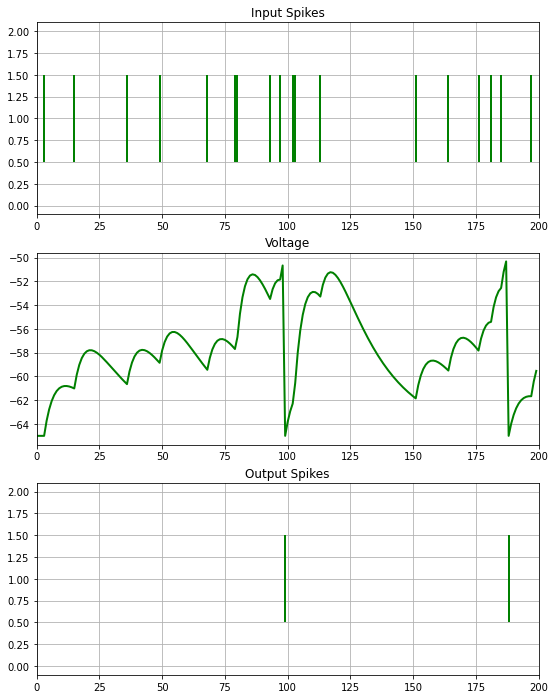

In [5]:
# spike_files = os.listdir('summary/common/')
# for f in spike_files:
        
#     # Simulation data
#     sfn = f.replace('.csv','')
sfn = "spikes_5"
i_spikes = genfromtxt("summary/common/"+ sfn +".csv", delimiter=',')
i_indexes = np.where(i_spikes>0)

# Perform simulation
v = [] # voltages
o_spikes = [] # output spikes
neuron_state = norse.LIFFeedForwardState(v=torch.as_tensor(-65.0), i=torch.as_tensor(0.0))
w = 25.38
for i_s in i_spikes:
    t = torch.as_tensor(i_s)
    out, neuron_state = lif_cell(t*w, neuron_state)
    o_spikes.append(out.detach().numpy())
    v.append(float(neuron_state.v))
o_spikes = np.array(o_spikes)
o_indexes = np.where(o_spikes>0)

# Save Voltages as *.csv for further comparison
print("\n\n\n*********** v max = %0.3f *********** \n\n\n" %(max(v)))
np.savetxt("summary/norse/" + "voltage_" + sfn + ".csv", np.array(v), delimiter=",")

# Plot spikes and voltages
fig, axs = plt.subplots(3, figsize=(9,12))

axs[0].eventplot(i_indexes, linewidths=2, colors='g') # Plot the timesteps where the neuron spiked
axs[0].set_title("Input Spikes")
axs[0].set_xlim((0,len(i_spikes)))
axs[0].grid()

axs[1].plot(v, linewidth=2, color='g')
axs[1].set_title("Voltage")
axs[1].set_xlim((0,len(i_spikes)))
axs[1].grid()

axs[2].eventplot(o_indexes, linewidths=2, colors='g') # Plot the timesteps where the neuron spiked
axs[2].set_title("Output Spikes")
axs[2].set_xlim((0,len(i_spikes)))
axs[2].grid()

fig.savefig("summary/norse/" + "All_" + sfn + ".png")
